In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Tem":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})
# If an error is experienced, skip the city.    
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | sydney
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | payo
Processing Record 18 of Set 1 | kottagudem
Processing Record 19 of Set 1 | mweka
Processing Record 20 of Set 1 | jimenez
Processing Record 21 of Set 1 | antalaha
Processing Record 22 of Set 1 | coahuayana
Processing

Processing Record 38 of Set 4 | kidal
Processing Record 39 of Set 4 | bull savanna
Processing Record 40 of Set 4 | figeac
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | vaini
Processing Record 43 of Set 4 | aksay
Processing Record 44 of Set 4 | barroualie
City not found. Skipping...
Processing Record 45 of Set 4 | dovers
Processing Record 46 of Set 4 | zavitinsk
Processing Record 47 of Set 4 | marzuq
Processing Record 48 of Set 4 | eselnita
Processing Record 49 of Set 4 | valparaiso
Processing Record 50 of Set 4 | salinopolis
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | pacific grove
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | coari
Processing Record 5 of Set 5 | obluche
City not found. Skipping...
Processing Record 6 of Set 5 | yarmouth
Processing Record 7 of Set 5 | sosnogorsk
Processing Record 8 of Set 5 | tidore
City not found. Skipping...
Processing Record 9 of Set 5 | boguchany
Processing Record 10 of Se

Processing Record 27 of Set 8 | andenes
Processing Record 28 of Set 8 | sydney mines
Processing Record 29 of Set 8 | bubaque
Processing Record 30 of Set 8 | belaya kholunitsa
Processing Record 31 of Set 8 | baykit
Processing Record 32 of Set 8 | olinda
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | cherskiy
Processing Record 35 of Set 8 | udachnyy
Processing Record 36 of Set 8 | iralaya
Processing Record 37 of Set 8 | diapaga
Processing Record 38 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 39 of Set 8 | ketchikan
Processing Record 40 of Set 8 | acari
Processing Record 41 of Set 8 | poddorye
Processing Record 42 of Set 8 | upata
Processing Record 43 of Set 8 | port moresby
Processing Record 44 of Set 8 | sturgis
Processing Record 45 of Set 8 | barrow
Processing Record 46 of Set 8 | khandyga
Processing Record 47 of Set 8 | cabo rojo
Processing Record 48 of Set 8 | kita
Processing Record 49 of Set 8 | eisiskes
Processing Record 50 

Processing Record 15 of Set 12 | katima mulilo
Processing Record 16 of Set 12 | kuching
Processing Record 17 of Set 12 | ilhabela
Processing Record 18 of Set 12 | lewisporte
Processing Record 19 of Set 12 | vrangel
Processing Record 20 of Set 12 | barcelos
Processing Record 21 of Set 12 | ambulu
Processing Record 22 of Set 12 | trinidad
Processing Record 23 of Set 12 | aljezur
Processing Record 24 of Set 12 | qandala
Processing Record 25 of Set 12 | amursk
Processing Record 26 of Set 12 | kautokeino
Processing Record 27 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 12 | fairbanks
Processing Record 29 of Set 12 | sampit
Processing Record 30 of Set 12 | mafinga
Processing Record 31 of Set 12 | araouane
Processing Record 32 of Set 12 | ternate
Processing Record 33 of Set 12 | dunafoldvar
Processing Record 34 of Set 12 | vardo
Processing Record 35 of Set 12 | asyut
Processing Record 36 of Set 12 | broome
Processing Record 37 of Set 12 | champerico
Processin

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Tem,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,51.89,65,52,1.01,AU,2022-04-11 14:46:18
1,Sydney,-33.8679,151.2073,67.71,90,100,26.46,AU,2022-04-11 14:42:11
2,Grindavik,63.8424,-22.4338,45.07,57,40,19.57,IS,2022-04-11 14:46:19
3,Pevek,69.7008,170.3133,-24.47,100,68,7.87,RU,2022-04-11 14:46:19
4,Dudinka,69.4058,86.1778,-6.11,94,32,6.82,RU,2022-04-11 14:46:19
5,Avarua,-21.2078,-159.7750,75.25,100,100,2.30,CK,2022-04-11 14:46:20
6,Ushuaia,-54.8000,-68.3000,40.66,93,100,13.80,AR,2022-04-11 14:44:53
7,Rikitea,-23.1203,-134.9692,78.91,73,2,19.39,PF,2022-04-11 14:46:20
8,Punta Arenas,-53.1500,-70.9167,44.62,93,97,19.15,CL,2022-04-11 14:45:32
9,Nikolskoye,59.7035,30.7861,46.87,77,100,5.30,RU,2022-04-11 14:46:21


In [11]:
city_data_df.rename(columns={'Max Tem':'Max Temp'},inplace=True)
new_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-04-11 14:46:18,-42.7826,147.0587,51.89,65,52,1.01
1,Sydney,AU,2022-04-11 14:42:11,-33.8679,151.2073,67.71,90,100,26.46
2,Grindavik,IS,2022-04-11 14:46:19,63.8424,-22.4338,45.07,57,40,19.57
3,Pevek,RU,2022-04-11 14:46:19,69.7008,170.3133,-24.47,100,68,7.87
4,Dudinka,RU,2022-04-11 14:46:19,69.4058,86.1778,-6.11,94,32,6.82
5,Avarua,CK,2022-04-11 14:46:20,-21.2078,-159.7750,75.25,100,100,2.30
6,Ushuaia,AR,2022-04-11 14:44:53,-54.8000,-68.3000,40.66,93,100,13.80
7,Rikitea,PF,2022-04-11 14:46:20,-23.1203,-134.9692,78.91,73,2,19.39
8,Punta Arenas,CL,2022-04-11 14:45:32,-53.1500,-70.9167,44.62,93,97,19.15
9,Nikolskoye,RU,2022-04-11 14:46:21,59.7035,30.7861,46.87,77,100,5.30


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

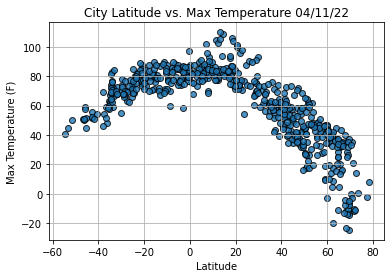

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black',linewidths=1,
           marker='o',alpha=0.8,label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

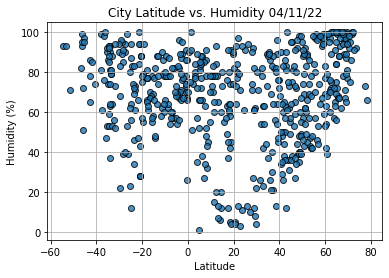

In [15]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           humidity,
           edgecolor='black',linewidths=1,
           marker='o',alpha=0.8,label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

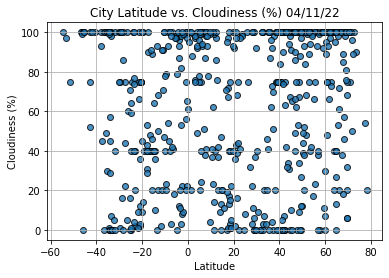

In [16]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           cloudiness,
           edgecolor='black',linewidths=1,
           marker='o',alpha=0.8,label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

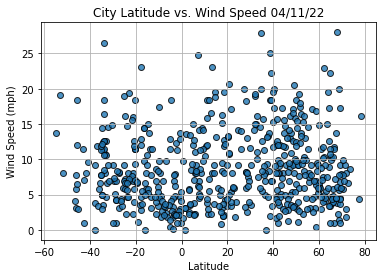

In [17]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           wind_speed,
           edgecolor='black',linewidths=1,
           marker='o',alpha=0.8,label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2022-04-11 14:42:33
Lat                      -33.0153
Lng                       27.9116
Max Temp                    68.94
Humidity                       88
Cloudiness                      0
Wind Speed                  12.66
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Grindavik,IS,2022-04-11 14:46:19,63.8424,-22.4338,45.07,57,40,19.57
3,Pevek,RU,2022-04-11 14:46:19,69.7008,170.3133,-24.47,100,68,7.87
4,Dudinka,RU,2022-04-11 14:46:19,69.4058,86.1778,-6.11,94,32,6.82
9,Nikolskoye,RU,2022-04-11 14:46:21,59.7035,30.7861,46.87,77,100,5.30
10,Saint George,US,2022-04-11 14:42:15,37.1041,-113.5841,43.39,21,0,0.00


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

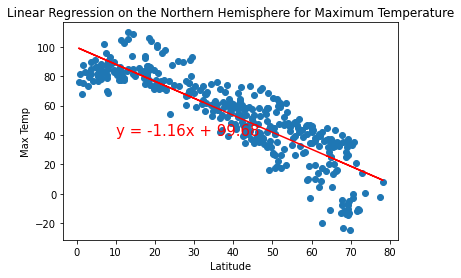

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

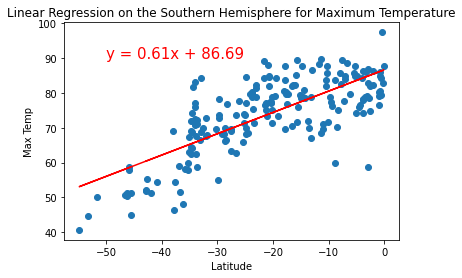

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

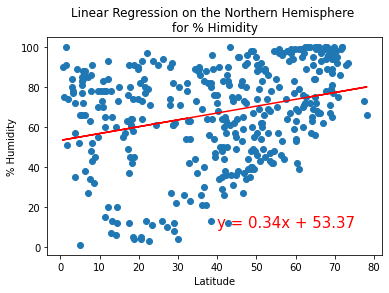

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      f'Linear Regression on the Northern Hemisphere \n'
                       f'for % Himidity', '% Humidity',(40,10))

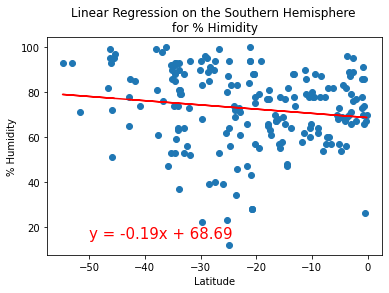

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      f'Linear Regression on the Southern Hemisphere \n'
                       f'for % Himidity', '% Humidity',(-50,15))

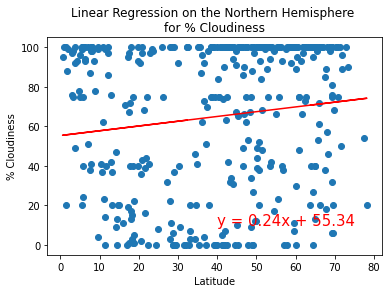

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      f'Linear Regression on the Northern Hemisphere \n'
                       f'for % Cloudiness', '% Cloudiness',(40,10))

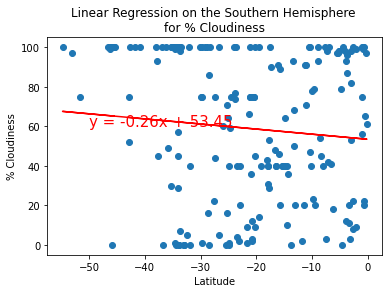

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      f'Linear Regression on the Southern Hemisphere \n'
                       f'for % Cloudiness', '% Cloudiness',(-50,60))

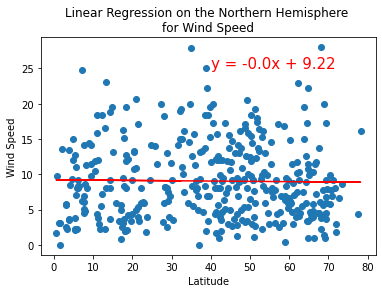

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      f'Linear Regression on the Northern Hemisphere \n'
                       f'for Wind Speed', 'Wind Speed',(40,25))

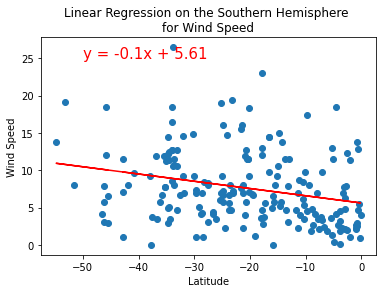

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      f'Linear Regression on the Southern Hemisphere \n'
                       f'for Wind Speed', 'Wind Speed',(-50,25))